In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import random
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np

random.seed(30)

df = pd.read_csv("data/us_change.csv", index_col=0)
df

,Quarter,Consumption,Income,Production,Savings,Unemployment
1,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
2,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
3,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
4,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
5,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...,...
194,2018 Q2,0.983112,0.661825,1.117424,-2.723974,0.0
195,2018 Q3,0.853181,0.806271,1.256722,-0.085686,-0.3
196,2018 Q4,0.356512,0.695142,0.948148,5.031337,0.2
197,2019 Q1,0.282885,1.100753,-0.488206,9.760287,-0.1


Utilizaremos modelos baselines como benchmarks para avaliar o desempenho de futuros modelos mais complexos. Esses modelos simples não terão grandes mudanças nos dados, como transformações ou técnicas adicionais. Isso serve para entendermos os resultados da maneira mais simples possível.

In [20]:
def convert_to_period(quarter):
    """
    Function to convert a string to a pandas period object. 
    Checks if the input is a string in the form '2019 Q1' or already a Period.
    """
    if isinstance(quarter, pd.Period):
        return quarter
    year, quarter_str = quarter.split()
    year = int(year)
    quarter = int(quarter_str[-1])
    return pd.Period(year=year, quarter=quarter, freq='Q')

df['Quarter'] = df['Quarter'].apply(convert_to_period)

In [21]:
flt = (df["Quarter"] >= "1970Q1") & (df["Quarter"] <= "2019Q2")
Consumption = df[["Quarter", "Consumption"]][flt]
Consumption.set_index("Quarter", inplace=True)

Consumption.head()

,Consumption
Quarter,
1970Q1,0.618566
1970Q2,0.451984
1970Q3,0.872872
1970Q4,-0.271848
1971Q1,1.901345


In [22]:
def fit_and_plot(dataset, strategy, sp=1):
    """
    Function to fit a forecasting strategy and plot the results,
    including the calculation of MAE, RMSE, and MASE.
    """

    train, test = dataset[:-40], dataset[-40:]
    

    forecaster = NaiveForecaster(strategy=strategy, sp=sp)
    forecaster.fit(train)
    y_pred = forecaster.predict(list(range(1, 41)))
    pred_intervals_95 = forecaster.predict_interval(coverage=0.95)
    pred_intervals_80 = forecaster.predict_interval(coverage=0.80)
    
    mae = mean_absolute_error(test, y_pred)
    rmse = np.sqrt(mean_squared_error(test, y_pred))
    
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    

    plot_series(dataset, 
                y_pred,
                labels=["y_train", "y_pred"], 
                pred_interval=pred_intervals_95)
    
    plot_series(dataset,
                y_pred,
                labels=["y_train", "y_pred"],
                pred_interval=pred_intervals_80)
    
    plt.show()


### Mean Method

MAE: 0.2858484325156872
RMSE: 0.3580368524798841


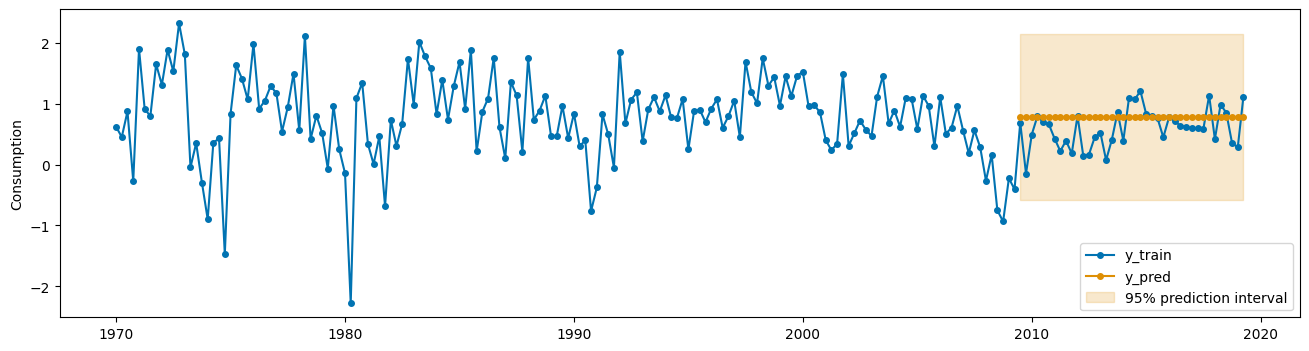

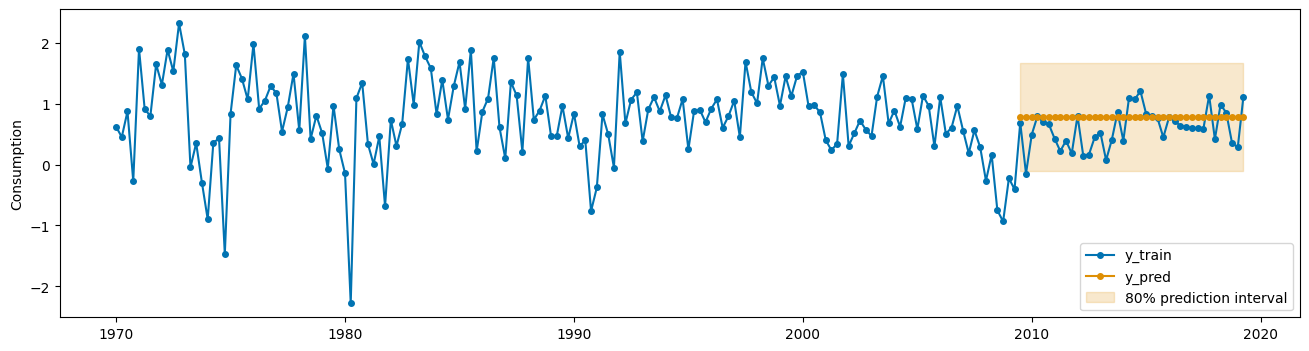

In [23]:
fit_and_plot(Consumption, strategy="mean")


### Naive (or random walk) method

MAE: 1.0071672410592745
RMSE: 1.0541747703354698


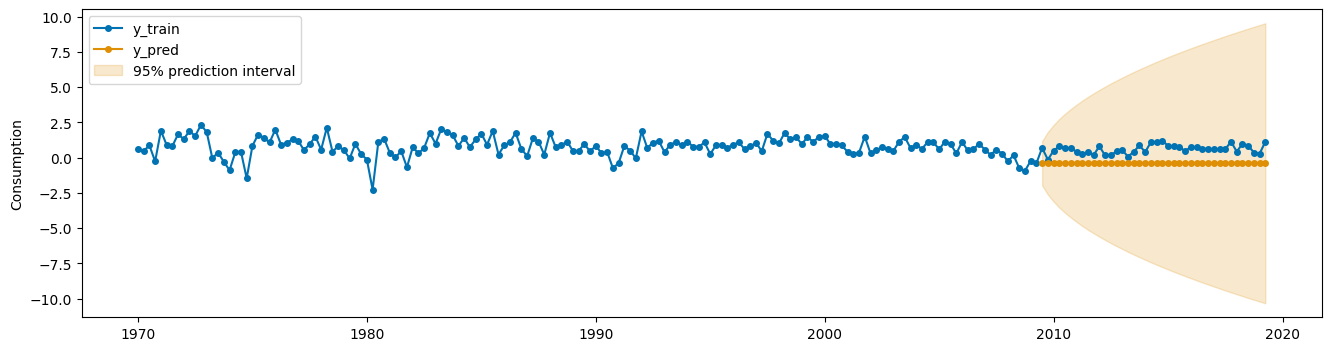

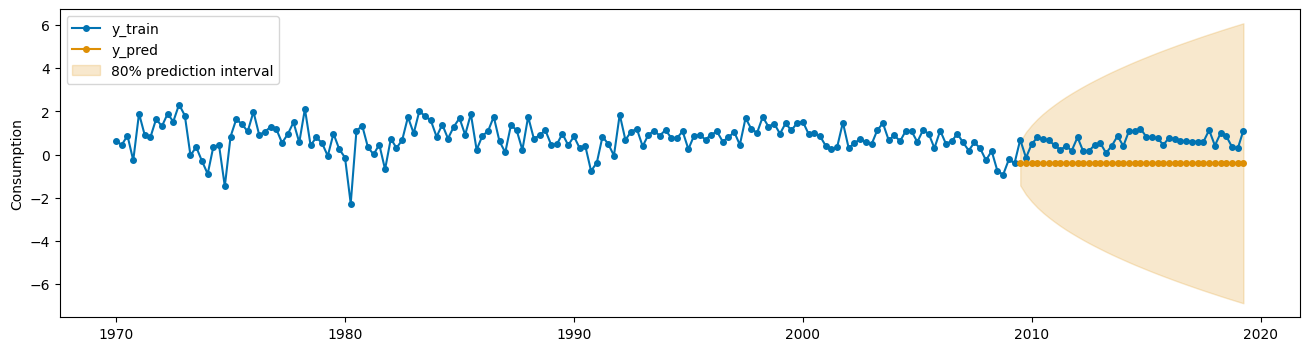

In [24]:
fit_and_plot(Consumption, strategy="last")

### Seasonal Naive method

MAE: 1.1809660421185963
RMSE: 1.2534042751049328


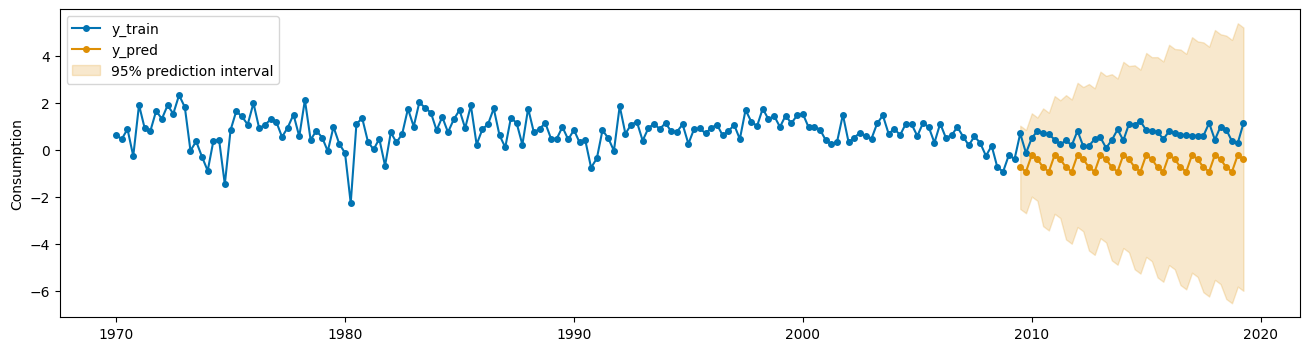

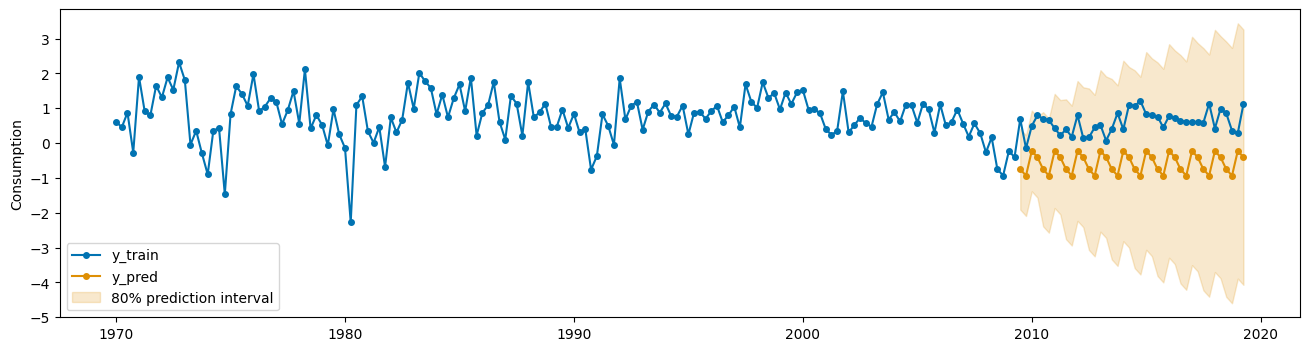

In [25]:
fit_and_plot(Consumption, strategy="last", sp=4)


### Drift method

MAE: 1.140927793687848
RMSE: 1.1919548943472622


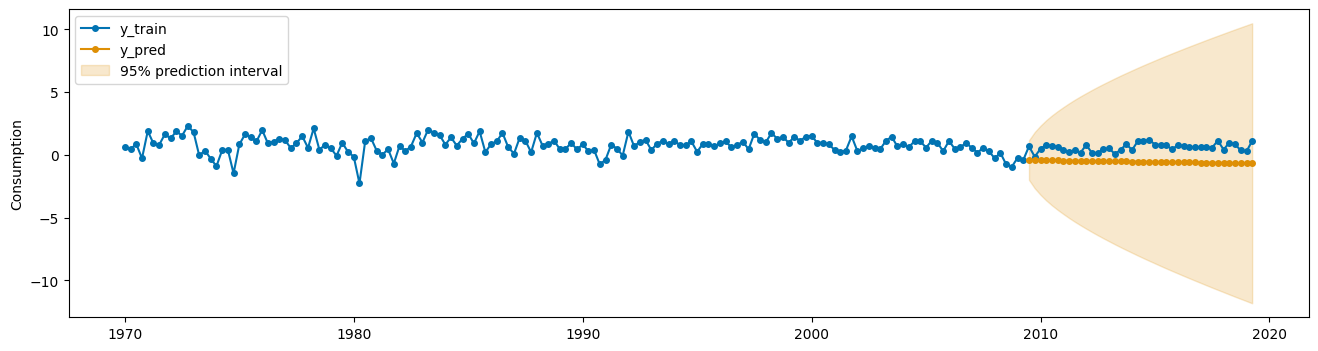

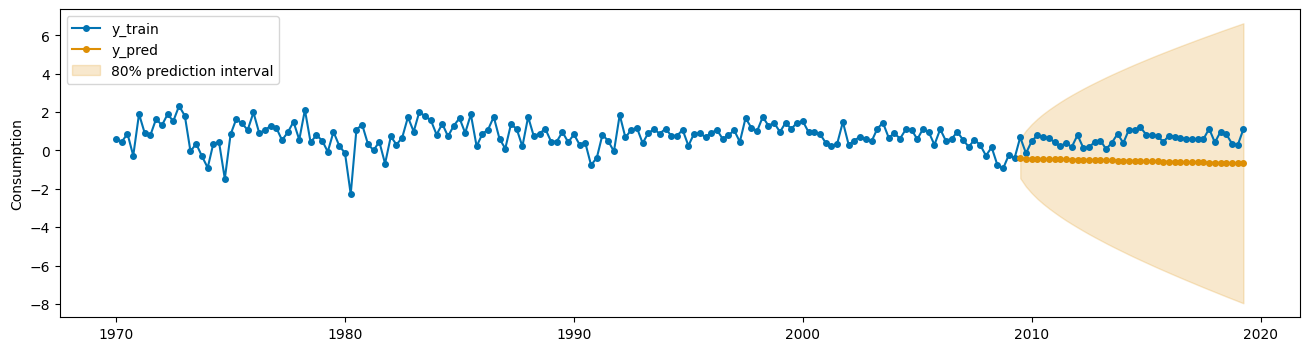

In [26]:
fit_and_plot(Consumption, strategy="drift")
